# Setup

In [1]:
import os
import glob

from roboflow import Roboflow
from ultralytics import YOLO, settings
root_dir = os.getcwd().replace('\\notebooks', '')
settings.update({'datasets_dir': f'{root_dir}/data/processed/test', 'runs_dir': f'{root_dir}/yolo/runs'})

In [2]:
# TODO: Rename class names in roboflow dataset to Data Matrix
with open('../roboflow_api_key.txt') as f:
    api_key = f.read().strip()

rf = Roboflow(api_key=api_key)
project = rf.workspace('rs-xldmw').project('data-matrix-codes')
version = project.version(2)
dataset = version.download('yolov11', '../data/processed/')

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ../data/processed/ in yolov11:: 100%|██████████| 366/366 [00:00<00:00, 2010.98it/s]


# Evaluation

In [3]:
# Load the models
model_best = YOLO('../yolo/runs/detect/train/weights/best.pt')
model_last = YOLO('../yolo/runs/detect/train/weights/last.pt')

# Run batched inference on a list of images (~5 seconds for 360 images (~0.014s per image))
files = glob.glob('../data/processed/test/images/*.jpg')
results_best = model_best(files)
results_last = model_last(files)


0: 640x640 (no detections), 2.7ms
1: 640x640 1 QR, 2.7ms
2: 640x640 (no detections), 2.7ms
3: 640x640 1 QR, 2.7ms
4: 640x640 1 QR, 2.7ms
5: 640x640 3 QRs, 2.7ms
6: 640x640 (no detections), 2.7ms
7: 640x640 2 QRs, 2.7ms
8: 640x640 1 QR, 2.7ms
9: 640x640 (no detections), 2.7ms
10: 640x640 (no detections), 2.7ms
11: 640x640 (no detections), 2.7ms
12: 640x640 1 QR, 2.7ms
13: 640x640 1 QR, 2.7ms
14: 640x640 (no detections), 2.7ms
15: 640x640 1 QR, 2.7ms
16: 640x640 1 QR, 2.7ms
17: 640x640 (no detections), 2.7ms
18: 640x640 (no detections), 2.7ms
19: 640x640 (no detections), 2.7ms
20: 640x640 1 QR, 2.7ms
21: 640x640 1 QR, 2.7ms
22: 640x640 1 QR, 2.7ms
23: 640x640 1 QR, 2.7ms
24: 640x640 (no detections), 2.7ms
25: 640x640 (no detections), 2.7ms
26: 640x640 (no detections), 2.7ms
27: 640x640 (no detections), 2.7ms
28: 640x640 1 QR, 2.7ms
29: 640x640 (no detections), 2.7ms
30: 640x640 4 QRs, 2.7ms
31: 640x640 (no detections), 2.7ms
32: 640x640 (no detections), 2.7ms
33: 640x640 (no detections)

Found 69/180 with predictions
Found 93 total boxes


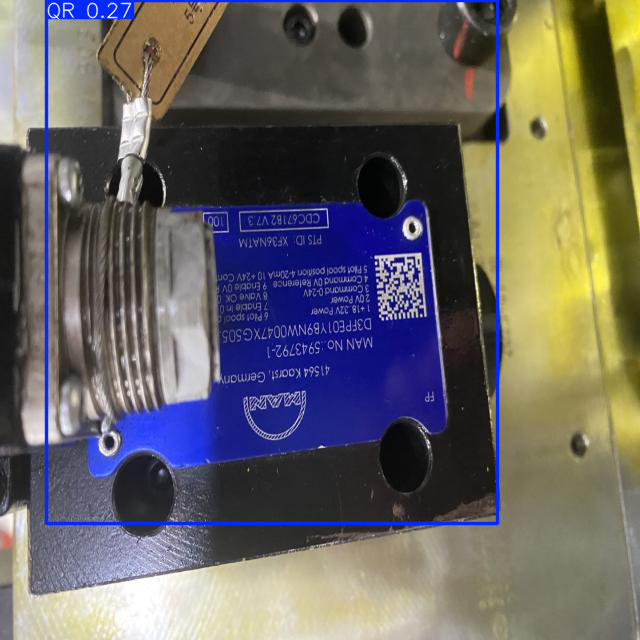

None


In [6]:
# prediction counts
total_boxes = 0
images_with_boxes = 0
for result in results_best:
    if result.boxes:
        images_with_boxes += 1
        total_boxes += len(result.boxes)
print(f'Found {images_with_boxes}/{len(files)} with predictions')
print(f'Found {total_boxes} total boxes')

# display results
for result in results_best:
    if result.boxes:
        print(result.show())
        break

Found 70/180 with predictions
Found 116 total boxes


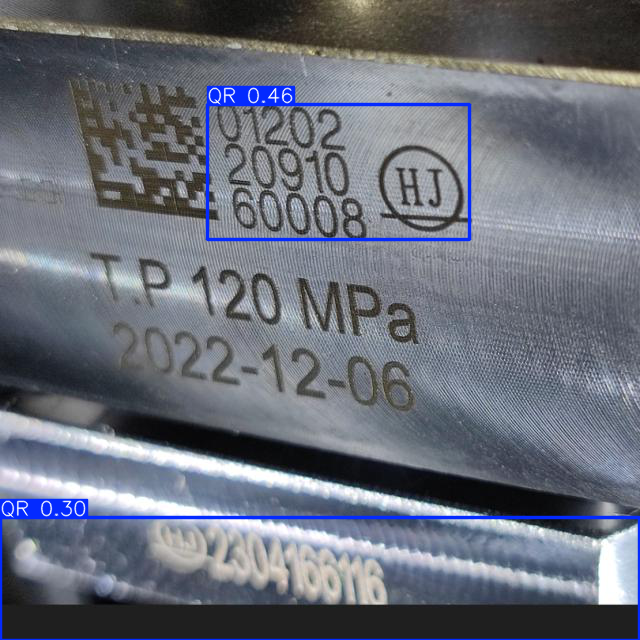

None


In [7]:
# prediction counts
total_boxes = 0
images_with_boxes = 0
for result in results_last:
    if result.boxes:
        images_with_boxes += 1
        total_boxes += len(result.boxes)
print(f'Found {images_with_boxes}/{len(files)} with predictions')
print(f'Found {total_boxes} total boxes')

# display results
for result in results_last:
    if result.boxes:
        print(result.show())
        break